In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from helper_functions import graph

# Parkinson's Disease Classification EDA

Here we would like to uncover a lot about the data as the documentation for the data is rather blank aside from the study this stems from.

In [2]:
raw_df = pd.read_csv("/Users/marko/Parkinson_Classification/data/raw/pd_speech_features.csv", header=1)
raw_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


755 features! A cursory glance yields that it looks like lots of these features were one-hot encoded or time series were placed in separate columns which is quite interesting.... TBC

In [3]:
raw_df.columns.tolist()

['id',
 'gender',
 'PPE',
 'DFA',
 'RPDE',
 'numPulses',
 'numPeriodsPulses',
 'meanPeriodPulses',
 'stdDevPeriodPulses',
 'locPctJitter',
 'locAbsJitter',
 'rapJitter',
 'ppq5Jitter',
 'ddpJitter',
 'locShimmer',
 'locDbShimmer',
 'apq3Shimmer',
 'apq5Shimmer',
 'apq11Shimmer',
 'ddaShimmer',
 'meanAutoCorrHarmonicity',
 'meanNoiseToHarmHarmonicity',
 'meanHarmToNoiseHarmonicity',
 'minIntensity',
 'maxIntensity',
 'meanIntensity',
 'f1',
 'f2',
 'f3',
 'f4',
 'b1',
 'b2',
 'b3',
 'b4',
 'GQ_prc5_95',
 'GQ_std_cycle_open',
 'GQ_std_cycle_closed',
 'GNE_mean',
 'GNE_std',
 'GNE_SNR_TKEO',
 'GNE_SNR_SEO',
 'GNE_NSR_TKEO',
 'GNE_NSR_SEO',
 'VFER_mean',
 'VFER_std',
 'VFER_entropy',
 'VFER_SNR_TKEO',
 'VFER_SNR_SEO',
 'VFER_NSR_TKEO',
 'VFER_NSR_SEO',
 'IMF_SNR_SEO',
 'IMF_SNR_TKEO',
 'IMF_SNR_entropy',
 'IMF_NSR_SEO',
 'IMF_NSR_TKEO',
 'IMF_NSR_entropy',
 'mean_Log_energy',
 'mean_MFCC_0th_coef',
 'mean_MFCC_1st_coef',
 'mean_MFCC_2nd_coef',
 'mean_MFCC_3rd_coef',
 'mean_MFCC_4th_coef',


In [4]:
raw_df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


Alright, nothing particularly meaningful or interesting coming from these routine checks. Although I will be interested in looking at say the class of variables indexed by time to see if there's any discrepency. The other thing to note is just simply looking at the features most correlated to the outcome as opposed to the features cited in the paper. The baseline features that were most popular according to the paper below are: Jitter, shimmer, fundamental frequency parameters, harmonicity parameters, RPDE, DFA, and PPE. 

In [3]:
corr_mat = raw_df.drop("class", axis=1).apply(lambda col: col.corr(raw_df["class"],
                                                                   method="spearman"))

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


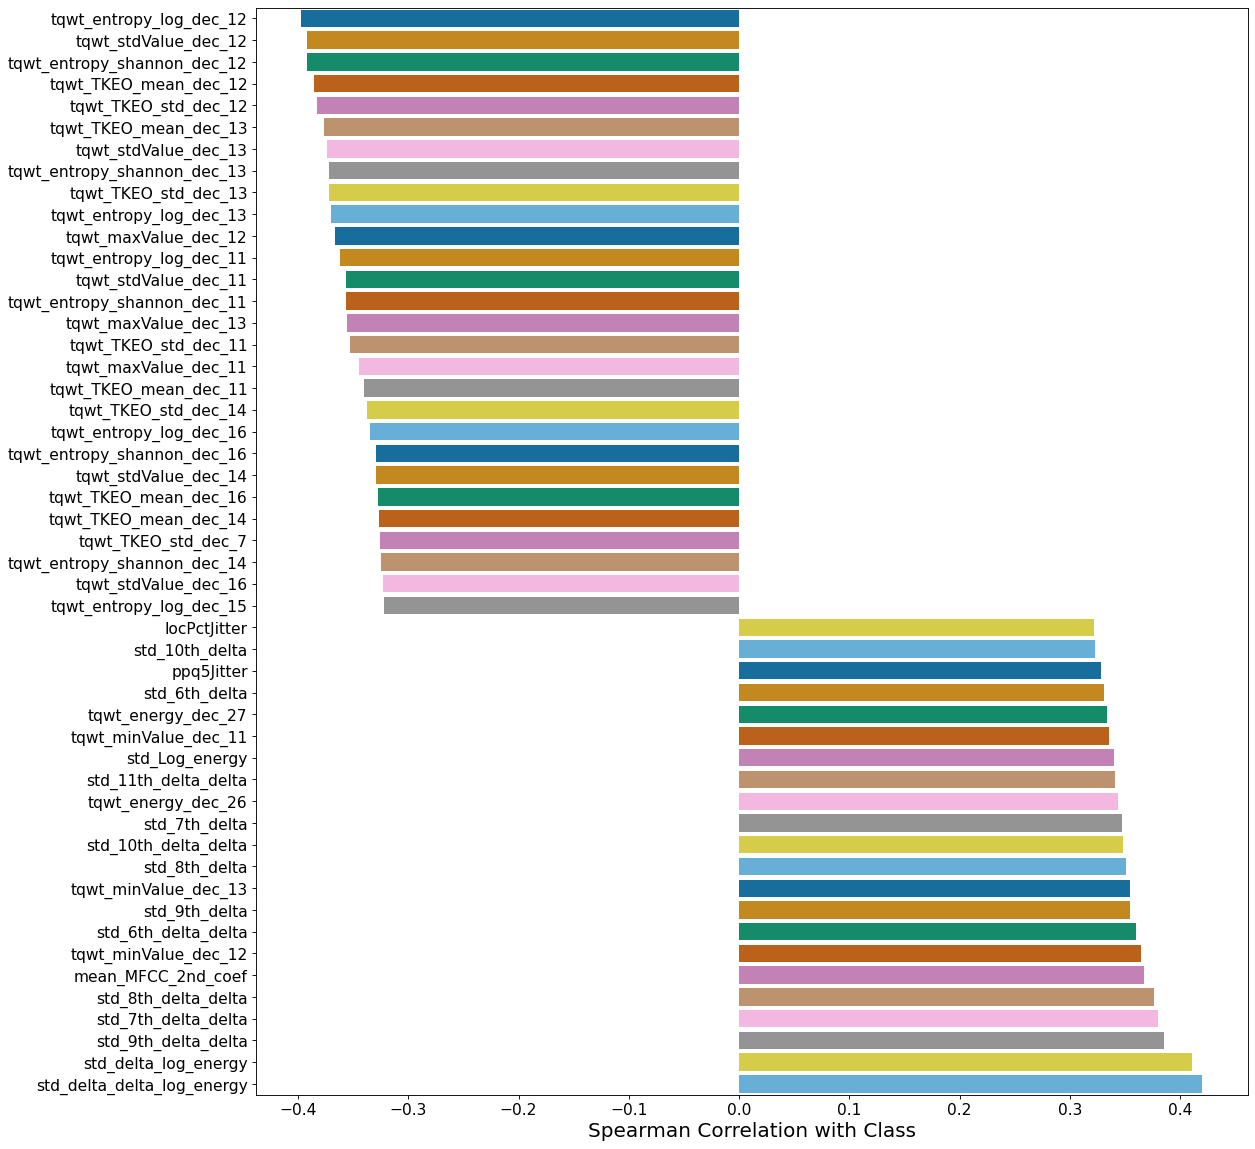

In [7]:
# 50 largest correlations in absolute value
largest_corr = corr_mat.iloc[corr_mat.abs().argsort()][-50:].sort_values(ascending=True)
graph.barplot(largest_corr,
              savefig=True, 
              title=None,
              xlab='Spearman Correlation with Class')
plt.savefig("./figs/spearman_corr_to_class.png", bbox_inches="tight")

I see some of the features mentioned in the paper - jitter, fundamental frequency parameters, and quite a lot of the time-series elements are all negatively correlated. However we need to test significance of time trends in the entropy, TKEO, and stdValue features to see if we can perhaps combine these to condense the data down.

# Sources

The original paper is given here: https://www.sciencedirect.com/science/article/pii/S1568494618305799?via%3Dihub